<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/hands_on_ml1/Hands_on_cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1 Score =  

In [2]:
import pandas as pd 
import os 



In [3]:
pwd = os.getcwd() 
filepath = os.path.join(pwd, '/content/sample_data/wine.csv')

In [4]:
data_import = pd.read_csv(filepath)
data_import.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


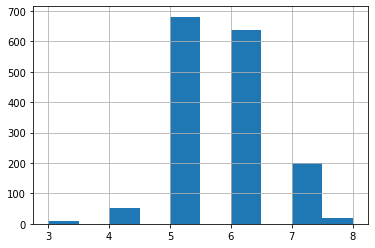

In [5]:
data_import['quality'].hist()

## 'Quality ' is our target value. we want to clasiffier these depending on the other features 

- we want to preddict if a wine has a quality of 5 

In [6]:
y = data_import['quality'] > 5
y

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool

- True. Valores mayores a 5
- False. Valores menores a 5

- Now, we create a new dataset without quality instance.

In [7]:
x = data_import.iloc[:, :-1 ]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Sklearn 

- before we start. we need to split our dataset in two sets, a set to train, another to test, since our model first needs trained.   

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42) 
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


- Now we have to do is scale our variable

In [9]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()  # we created a scalar object 

scaled_X_train=  scaler.fit_transform(X_train) # we called to scaler and  took our X_train and put inside the function .fit_transform()

scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [10]:
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test

array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

- okey. looks about accurate

In [11]:
def preprocessing_function(x, y): 
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)  

  scaled_X_train = scaler.fit_transform(X_train)
  scaled_X_test = scaler.transform(X_test)

  return scaled_X_train, scaled_X_test, y_test, y_train 



## SVM 

- now, we are going to use an algorithm called Suport vector machine for this clasification problem. let go us ahead. 

In [12]:
from sklearn.svm import SVC

svc_clf = SVC()  # we create a svc_clf object 

svc_clf.fit(scaled_X_train, y_train) # we train the model 

  

SVC()

## Predictions 

In [13]:
svc_clf_predictions = svc_clf.predict(scaled_X_test)
svc_clf_predictions

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

- our predictions of the 'quality' instance, remember if the output is True means the quality is higher (5), if the output is false the quality is lower than 5

array([[109,  32],
       [ 43, 136]])

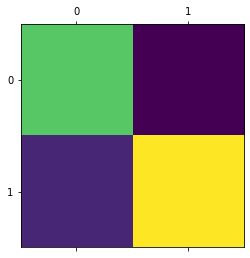

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


plt.matshow(confusion_matrix(y_test, svc_clf_predictions))
confusion_matrix(y_test, svc_clf_predictions)

In [15]:
accuracy_score(y_test, svc_clf_predictions)

0.765625

In [16]:
precision_score(y_test, svc_clf_predictions)

0.8095238095238095

In [17]:
recall_score(y_test, svc_clf_predictions)

0.7597765363128491

In [18]:
def algo_accuracy(y_test, predictions):
  conf_matrix = confusion_matrix(y_test,predictions)
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)

  return conf_matrix, accuracy, precision, recall
  

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [20]:
rfc_clf = grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=4, n_estimators=30)

In [21]:
rfc_predictions = rfc_clf.predict(scaled_X_test)
rfc_predictions

array([False, False, False, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True,

In [22]:
algo_accuracy(y_test, rfc_predictions)

(array([[114,  27],
        [ 44, 135]]), 0.778125, 0.8333333333333334, 0.7541899441340782)

## Clasification MNIST SET

- Now we are going to use the MNIST set clasification, which is a set of 70,000 small images of digits handwritten by high school students and employees.

Each image is labeled with the digit it represents. 

In [23]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)


In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- This data set is structed like a dictionary. 
  - contain a data key an array with one row per instance and one column per future 

  - a target key containing an array with labels  

In [25]:
X, y = mnist.data, mnist.target
y = y.astype(int) # The labels are strings but we want them to be integer

X.shape

(70000, 784)

# Now we create our train and test set 

 - we split the dataset into a training set (the fisrt 60000 images) and a test set (the last 10000 images)

In [26]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


### Training a Binary Classifer 

- Example : this classifer is capable of clasiified between just tow classes. 5 or not 5. 

In [27]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [28]:
y_train_5

array([ True, False, False, ...,  True, False, False])

### Stochastic Gradient Descent (SGD)
- this classifier is a good option if you have a large dataset
- The SGD works to reduce the cost function (error) 

In [29]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# Performance Measures

## Cross Validation 

- Imagine you split your dataset in k folds, with the objetive to train the folds as the same time, least k-1. this last that we did not use to train, we use to test the model. this process we repitek k times. 

 with a different subset reserved for evaluation (and excluded from training) each time.
 

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

- Above 96% accuracy (ratio of correct predictions )

In [31]:
y_train_5_pred = sgd_clf.predict(X_train)
y_train_5_pred

array([ True, False, False, ...,  True, False, False])

### Before use the matrix confusion, we can use the cross_val_predict() function 

In [32]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3 )

- Like the cross_val_score function, cross_val_predict performs k-folds cross-validation, but instead of returning scores, it returns predictions made on each fold 

## Confusion Matrix 

- the confusion matrix has the target to measure the accuracy of model, this involves the confusion matrix count the number of predictions that they were true in a class positive (True Positive)
   - EXAMPLE. The model predict 'yes' on a class 'yes' 

there are 4 entries in a matriz confussion 4x4 
1.  TP  (True positive)
2.  FN  (False Negative)
3.  TN  (True Negative)
4.  FP  (False Positive)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Metrics 
### Precision and Recall 

Precision : $ \frac{TP}{TP + FP} $

Recall : $ \frac{TP}{TP + FN}$

In [34]:
from sklearn.metrics import precision_score, recall_score

a = precision_score(y_train_5, y_train_pred)
b = recall_score(y_train_5, y_train_pred)

print(' Precision score \t{:.3f} '.format(a))
print('Recall score \t{:.3f} '.format(b))


 Precision score 	0.837 
Recall score 	0.651 


it is convenient to combine precision and recall into a single metric called the $F_{1}score $ 

### F_1 = $ \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 * \frac{precision * recall}{precision+recall} = \frac{TP}{TP + \frac{FN + FP}{2}} $

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Trade-off

In [36]:
some_digit = X[0]
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([2164.22030239])

In [37]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

let´s raise the threshold.

In [38]:
threshold_1 = 8000 
y_some_digit_pred = (y_scores > threshold_1)
y_some_digit_pred

array([False])

CONCLUSION: when the threshold raise the recall decreases
- How do we decide which threshold to use?

first. Use the cross_val_predict() function. to get the scores of all instances in the training set 

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

with this scores, we use the precision_recall_curve() function to compute precision and recall for all posible thresholds 

In [40]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


### Ploting 

In [41]:
def plot_precision_recall_vs_threshols(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
  plt.legend()
  plt.xlabel("Threshold")
  

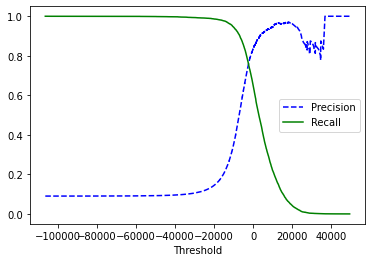

<Figure size 576x576 with 0 Axes>

In [42]:
plot_precision_recall_vs_threshols(precisions, recalls, thresholds)
plt.figure(figsize=(8, 8)) 
plt.show()

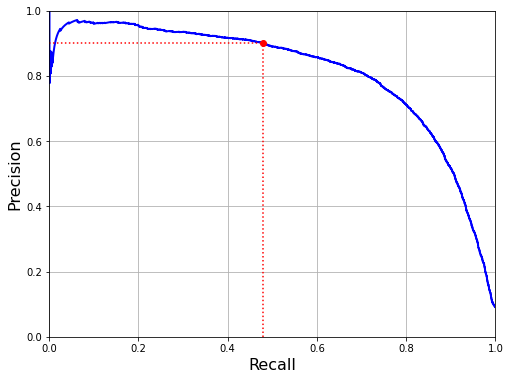

In [43]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [44]:
y_train_pred_90 = (y_scores >= threshold_90_precision)


In [45]:
print(precision_score(y_train_5, y_train_pred_90))

print(recall_score(y_train_5, y_train_pred_90))


0.9000345901072293
0.4799852425751706


as we can see, we have a precision around 90% but our recall is too low

- TIP 
    - if someone says: let´s reach 99% precision
    - you sholud ask : at what recall?

# ROC Curve (Receiver Operating Characteristic)

- Plot Recall vs Specificity 

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


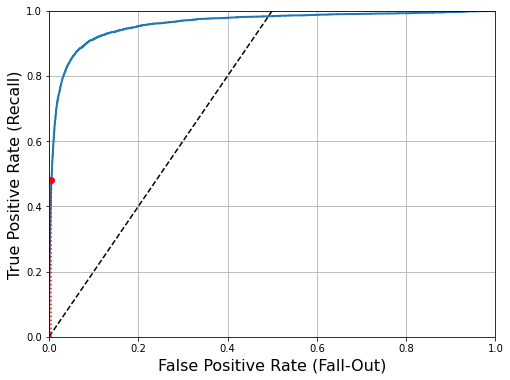

In [47]:
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,2], 'k--') #diashed diagonal 
  plt.axis([0, 1, 0, 1])                                    
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
  plt.grid(True)     

plt.figure(figsize=(8, 6))  
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")  
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state= 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')


- ROC Curve. 
we use a Random forest model, so we have a class probabilities, not a scores, but we cad use the probabilities instead of the scores, and put on the roc curve function(). 

- let´s use the positive class's probability as the score 

In [50]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

## ploting

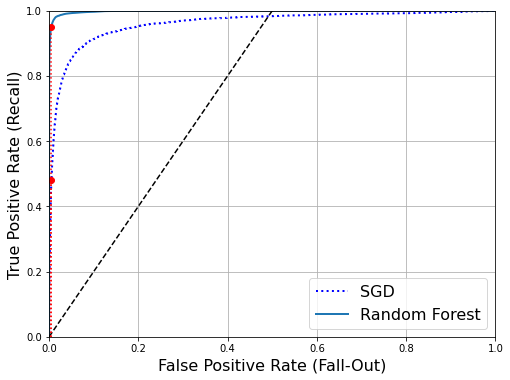

In [51]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Conclusion: 
- as we can see the Random Forest classifier's curve is more better than SGDClassifier's, it comes much closer to the top-left corner. 

for another hand, we can see the ROC AUC Score it's also significatly better

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3 )
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [54]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## Results. as we can see we have a precision score around 99% and a recall socre around 86% 

# MultiClass Classification 

- we use more tha two classes now 

## Strategys 
   - One-versus-all 
   - One versus One 
   

In [55]:
from sklearn.svm import SVC 

svm_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf.predict([some_digit])

array([5])

### decision_function ().
- sklearn has a strategy to use OvO. it trained 45 binary classifiers. after this got the decision scores for the image, and select the class that won most duels.  

In [56]:
some_digits_scores = svc_clf.decision_function([some_digit])
some_digits_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [57]:
max= np.max(some_digits_scores)
max

9.313248199189204

In [58]:
np.argmax(some_digits_scores)

5

### One versus all function. OvR

In [64]:
# this code creates a multiclass classifer using the OvR strategy based on an SVC.

from sklearn.multiclass import OneVsRestClassifier
#ovr_clf = OneVsRestClassifier(SVC())

In [61]:
#ovr_clf.fit(X_train, y_train)
#ovr_clf.predict([some_digit])

In [62]:
#len(ovr_clf.estimators_)

Training a SDGClassifier is just as easy 

In [66]:
sdg_clf = OneVsRestClassifier(SGDClassifier())
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3])

In [67]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

- it gets over 84% on all test folds. buy you can do much better. simply scaling the inputs 

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_trained_scaled, y_train, cv = 3, scoring = 'accuracy')

  

array([0.8983, 0.891 , 0.9018])

# Error analysis

- we can create a confusion matrix to look which instances were correctly classifier. but first we have to make a predictions 

In [71]:
y_train_pred = cross_val_predict(sgd_clf, X_trained_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx 

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

### Using matplotlib

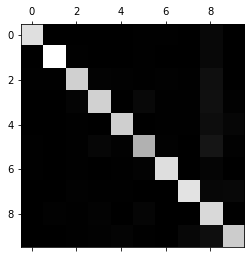

In [72]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

# Multilabel Claification 
- a classification system that outputs multiple binary tags is called multilabel classification 